In [1]:
import torch
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/data') # 드라이브 연결

Mounted at /content/data


## Loading and normalizing datasets

- torch.utils.data.Dataset # 전체 데이터 정의 
- torch.utils.data.DataLoder # 전체 데이터중 배치 사이즈 만큼 가져옴

## datasets

In [4]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt



In [6]:
training_data = datasets.FashionMNIST(
    root="desktop", # path where the data is stored
    train=True, # specifies training or test dataset
    download=True, # 있어도 다시 다운
    # transform=ToTensor() # specify the feature and label transformations
)

test_data = datasets.FashionMNIST(
    root="desktop",
    train=False,
    download=True,
    transform=ToTensor()
)

In [8]:
type(training_data) , type(test_data)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

In [9]:
len(training_data) , len(test_data)

(60000, 10000)

In [17]:
training_data[6375]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA3F2315DC0>, 3)

In [ ]:
import numpy as np 

np.array(training_data[6375][0]) # 3675는 타겟정보 , 0인덱스는 피처정보

In [18]:
np.array(training_data[6375][0]).shape

(28, 28)

In [20]:
training_data[6375][0]

In [22]:
training_data[6375][1]

3

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

## data loader

In [49]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True) # 실행될때마다 64개 리턴

In [50]:
# Display image and label.
test_features, test_labels = next(iter(test_dataloader)) # next , iter 로 가져옴
print(f"Feature batch shape: {test_features.size()}") # (1,28,28) 64개  # (1,28,28) -> 흑백, (3,28,28) -> 컬러 
print(f"Labels batch shape: {test_labels.size()}")


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


In [51]:
imp = test_features[0].shape # 맨 앞에 차원이 사라짐 가장 밖에있는 [] 벗겨짐 
imp

torch.Size([1, 28, 28])

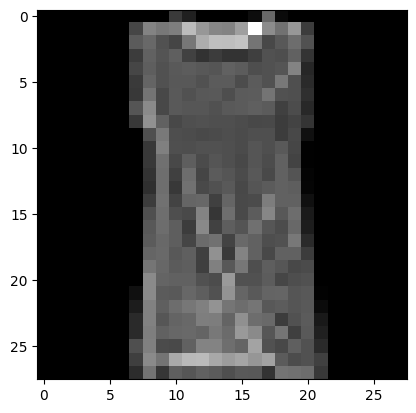

Label: 0


In [52]:
img = test_features[0].squeeze() # [1,28,28] -> [28,28]
label = test_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [45]:
img = test_features[0]
img.shape

torch.Size([1, 28, 28])

## 정규화(비정규)

In [54]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds1 = datasets.FashionMNIST(
    root="desktop",
    train=True,
    download=True
)

In [55]:
ds_features, ds_label = ds1[1]

In [ ]:
np.array(ds_features)

In [58]:
ds_label

0

## 정규화(정규화)

In [59]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds2 = datasets.FashionMNIST(
    root="desktop",
    train=True,
    download=True,
    transform=ToTensor(), # Features 정규화 (0과 1로 스케일링 된다)
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) # target 정규화 (onehotencoding방식)
)

In [60]:
ds_feautres, ds_label = ds2[1]

In [ ]:
ds_feautres

In [62]:
ds_label

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])